# Problem Statement:     Predicting Diabetes in Pima Indian Women

## Description:
The Pima Indians Diabetes dataset is a collection of medical data from Pima Indian women in Arizona, USA. This dataset is widely used for the development and evaluation of predictive models to identify individuals at high risk of developing diabetes. The goal of this project is to build a predictive model that can accurately classify individuals as either diabetic or non-diabetic based on a set of medical and demographic features.

## Dataset Details:

The dataset contains the following features:

#### 1.Pregnancies: Number of times pregnant.
#### 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
#### 3. BloodPressure: Diastolic blood pressure (mm Hg).
#### 4. SkinThickness: Triceps skin fold thickness (mm).
#### 5. Insulin: 2-Hour serum insulin (mu U/ml).
#### 6. BMI: Body mass index (weight in kg / (height in m)^2).
#### 7. DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history.
#### 8. Age: Age in years.
#### 9. Class The binary target variable indicating the presence (1) or absence (0) of diabetes.

# Apply Logistic Regression Model.


In [132]:
#Pima-Indians-Diabetes Prediction
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Loading the Data set

In [133]:
df=pd.read_csv("pima-indians-diabetes .csv")

In [134]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EDA Operations

In [135]:
df.set_axis(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Class'],axis='columns', inplace=True)

In [136]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Analysing the data 

In [137]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### We have some '0's in data set which not be '0' like "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" and "BMI"

In [138]:
df.Glucose=df.Glucose.replace(0,df.Glucose.mean())
df.BloodPressure=df.BloodPressure.replace(0,df.BloodPressure.mean())
df.SkinThickness=df.SkinThickness.replace(0,df.SkinThickness.mean())
df.Insulin=df.Insulin.replace(0,df.Insulin.mean())
df.BMI=df.BMI.replace(0,df.BMI.mean())

In [139]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [140]:
df.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype=object)

In [141]:
df.Class.value_counts()

0    500
1    268
Name: Class, dtype: int64

#### Class The binary target variable indicating the presence (1) or absence (0) of diabetes.
#### Also Data is not balanced 

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#### All variables are numbers

In [143]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

#### No Missing values in data set

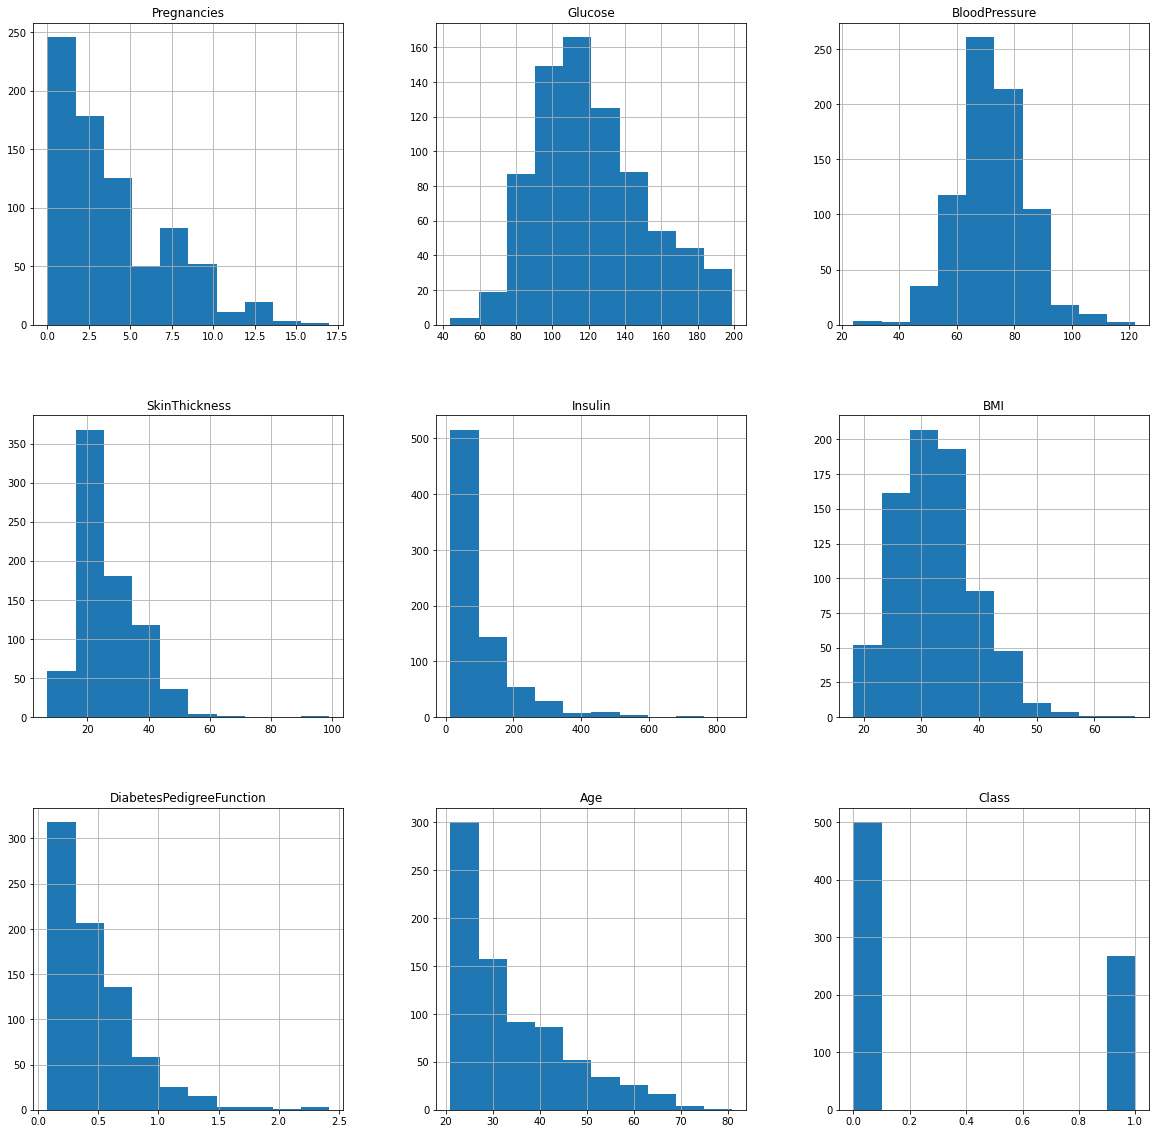

In [144]:
df.hist(figsize=(20,20))
plt.show()

In [145]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.533225
BloodPressure               0.173050
SkinThickness               1.226670
Insulin                     3.291825
BMI                         0.601103
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Class                       0.635017
dtype: float64

#### 'DiabetesPedigreeFunction' variable is more skewed 

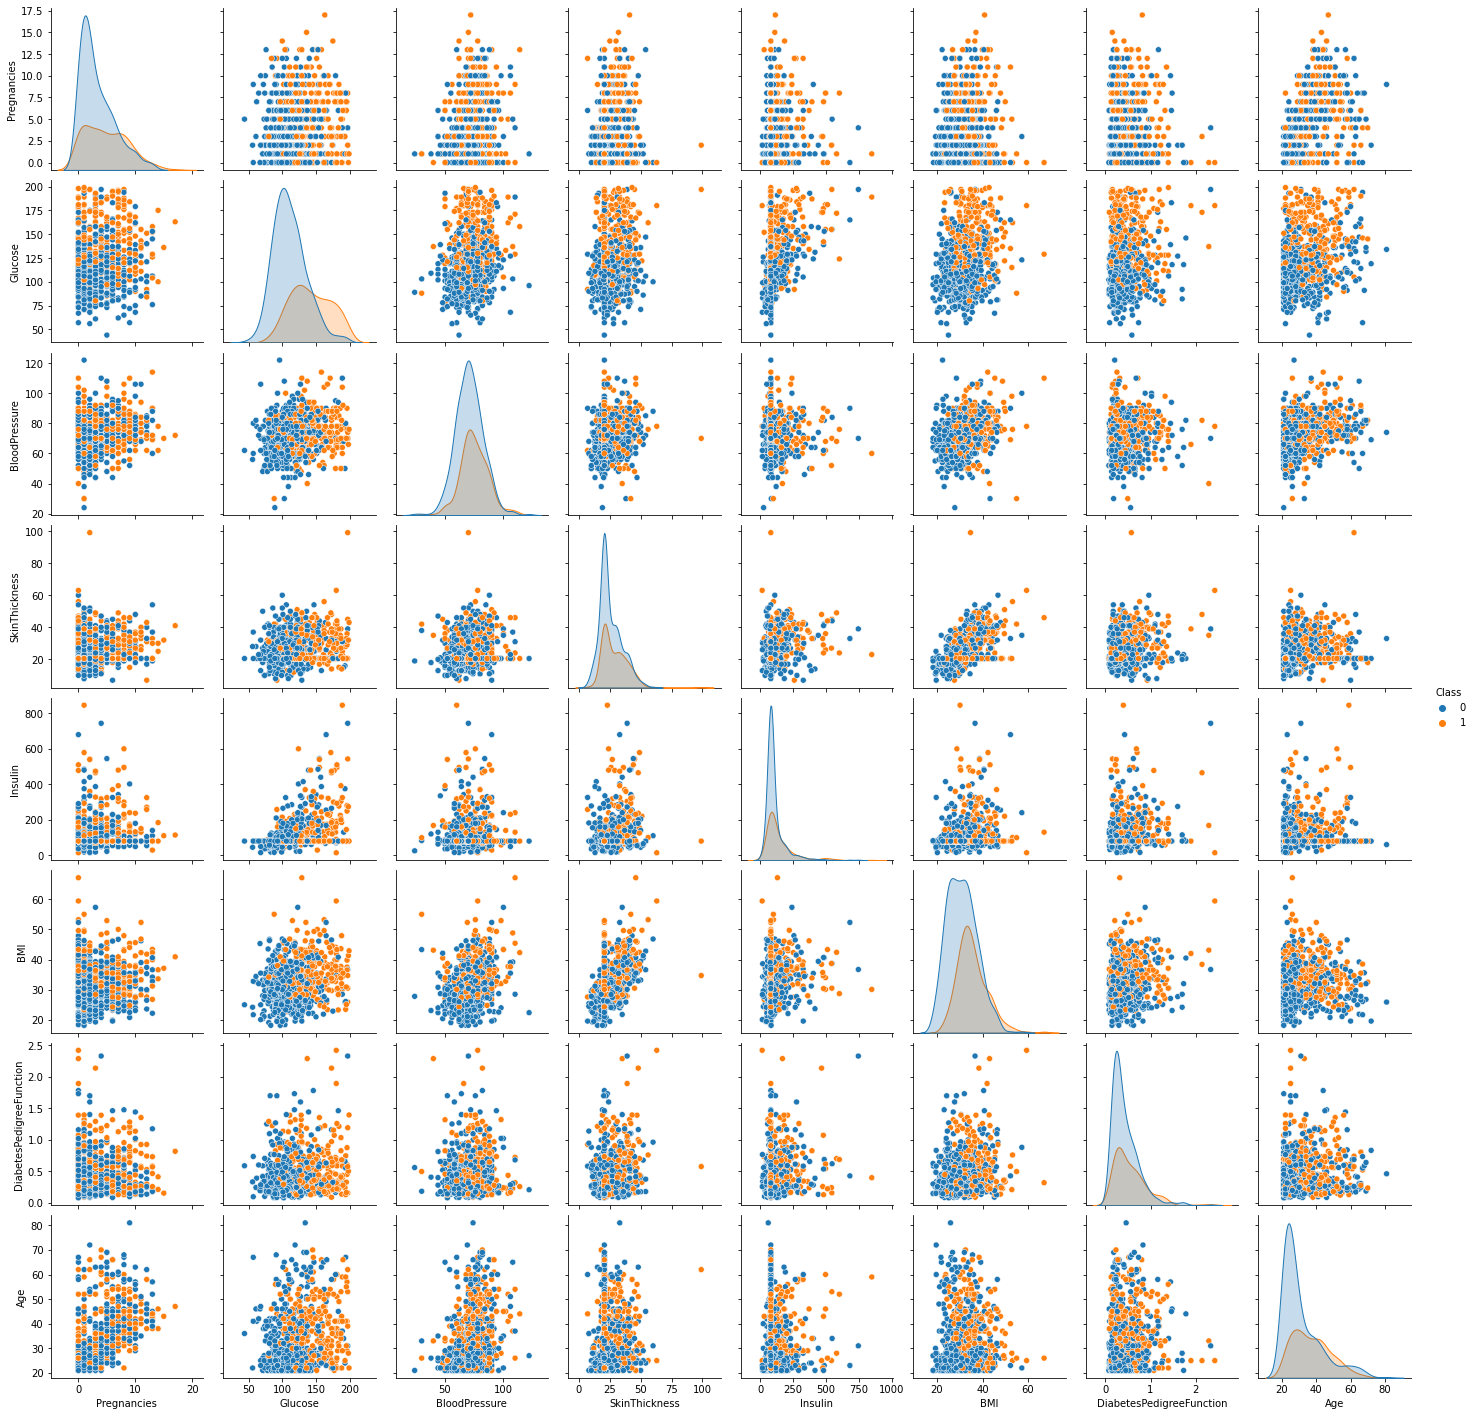

In [146]:
sns.pairplot(hue='Class', data=df)
plt.show()

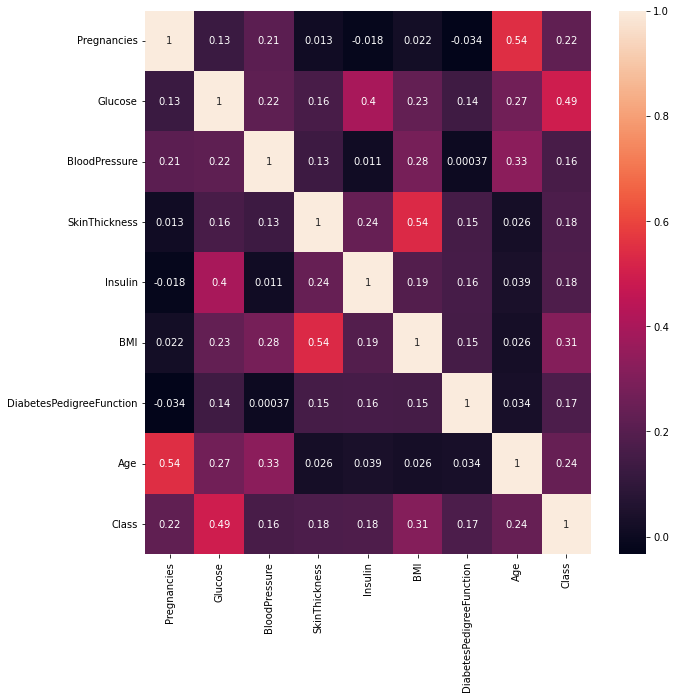

In [147]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Logistic Regression (Used for Classification only)

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [149]:
X=df.iloc[:,0:8]
y=df.iloc[:,-1].values

In [150]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [151]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=23)

In [152]:
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [153]:
# Prediction for train data set
y_pred = clf.predict(X_train)

In [154]:
acc1 = accuracy_score(y_train, y_pred)
print("Logistic Regression model accuracy for train data (in %):", acc1*100)

Logistic Regression model accuracy for train data (in %): 76.54723127035831


In [155]:
# Prediction for train data set
y_pred1 = clf.predict(X_test)

In [156]:
acc = accuracy_score(y_test, y_pred1)
print("Logistic Regression model accuracy for test data (in %):", acc*100)

Logistic Regression model accuracy for test data (in %): 80.51948051948052


# Confusion Matrix

In [157]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred1)  

In [158]:
cm

array([[89, 12],
       [18, 35]], dtype=int64)

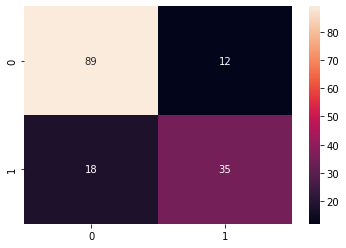

In [159]:
sns.heatmap(cm,annot=True)
plt.show()

In [160]:
log_train1=round(clf.score(X_train,y_train)*100,2)
log_accuracy1=round(accuracy_score(y_pred1,y_test)*100,2)

In [161]:
print("Training Accuracy :",log_train1,"%")
print("Test Accuracy :",log_accuracy1,"%")
print("\033[1m------------------------------------------\033[0m")
print("Classification Report Test data :",classification_report(y_test,y_pred1))
print("\033[1m------------------------------------------\033[0m")


Training Accuracy : 76.55 %
Test Accuracy : 80.52 %
------------------------------------------
Classification Report Test data :               precision    recall  f1-score   support

           0       0.83      0.88      0.86       101
           1       0.74      0.66      0.70        53

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154

------------------------------------------


# Naive Bayes Algorithoms

In [162]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(X_train)  
x_test = sc.transform(X_test)  

In [163]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

GaussianNB()

In [164]:
# Predicting the Test set results  
y_pred2 = classifier.predict(x_test)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [165]:
acc1 = accuracy_score(y_test, y_pred2)
print("Logistic Regression model accuracy for train data (in %):", acc1*100)

Logistic Regression model accuracy for train data (in %): 65.5844155844156


In [166]:
# Prediction for train data set
y_pred3 = clf.predict(x_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [167]:
acc = accuracy_score(y_train, y_pred3)
print("Logistic Regression model accuracy for test data (in %):", acc*100)

Logistic Regression model accuracy for test data (in %): 64.82084690553745


In [168]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm1 = confusion_matrix(y_test, y_pred2)  

In [169]:
cm1

array([[96,  5],
       [48,  5]], dtype=int64)

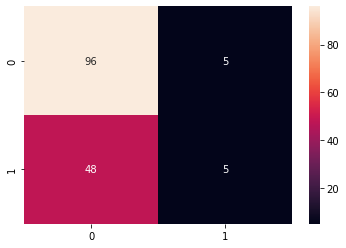

In [170]:
sns.heatmap(cm1,annot=True)
plt.show()

In [171]:
log_train2=round(clf.score(x_train,y_train)*100,2)
log_accuracy2=round(accuracy_score(y_pred2,y_test)*100,2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [172]:
print("Training Accuracy :",log_train2,"%")
print("Testing Accuracy :",log_accuracy2,"%")
print("\033[1m------------------------------------------\033[0m")
print("Classification Report Testing data :",classification_report(y_test,y_pred2))
print("\033[1m------------------------------------------\033[0m")


Training Accuracy : 64.82 %
Testing Accuracy : 65.58 %
------------------------------------------
Classification Report Testing data :               precision    recall  f1-score   support

           0       0.67      0.95      0.78       101
           1       0.50      0.09      0.16        53

    accuracy                           0.66       154
   macro avg       0.58      0.52      0.47       154
weighted avg       0.61      0.66      0.57       154

------------------------------------------
